# Light Gradient Boosting

In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from accel.read_data import prep_data
from accel.constants import DATA_DIR
from accel.training import model_tune, score

from lightgbm import LGBMRegressor

# For reproducibility
np.random.seed(42)

## Data prep
Use the unnormalised data without doing one-hot encoding.

In [19]:
X_train, X_val, X_test, y_train, y_val, y_test, means_modes = prep_data(DATA_DIR / "shared/eliminated-missing-participants.csv",
                                                                       one_hot=True)

In [20]:
print(X_train.shape)
X_train.head()

(60829, 443)


,Getting up in morning | Instance 0,Mouth/teeth dental problems | Instance 0_Painful gums,Attendance/disability/mobility allowance | Instance 0_Disability living allowance,Mouth/teeth dental problems | Instance 0_Mouth ulcers|Painful gums|Toothache|Dentures,Qualifications | Instance 0_College or University degree|CSEs or equivalent,Duration of walks | Instance 0,Mouth/teeth dental problems | Instance 0_Painful gums|Loose teeth|Toothache|Dentures,"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0_Emphysema/chronic bronchitis|Asthma",Qualifications | Instance 0_A levels/AS levels or equivalent|CSEs or equivalent,"Qualifications | Instance 0_O levels/GCSEs or equivalent|Other professional qualifications eg: nursing, teaching",...,Salt added to food | Instance 0_Never/rarely,Qualifications | Instance 0_O levels/GCSEs or equivalent|CSEs or equivalent|NVQ or HND or HNC or equivalent,Qualifications | Instance 0_A levels/AS levels or equivalent|O levels/GCSEs or equivalent|NVQ or HND or HNC or equivalent,"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor | Instance 0_Blood clot in the leg (DVT)|Blood clot in the lung|Hayfever, allergic rhinitis or eczema",Irritability | Instance 0,Exposure to tobacco smoke at home | Instance 0_90,Tea intake | Instance 0_14,Tea intake | Instance 0_13,Qualifications | Instance 0_College or University degree|NVQ or HND or HNC or equivalent,Mouth/teeth dental problems | Instance 0_Painful gums|Bleeding gums
17537,3.0,0,0,0,0,45.000000,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
77203,2.0,0,0,0,0,20.000000,0,0,0,0,...,1,0,0,0,1.0,0,0,0,0,0
83172,2.0,0,0,0,0,20.000000,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
74938,0.0,0,1,0,0,56.327705,0,0,0,0,...,1,0,1,0,1.0,0,0,0,0,0
29263,2.0,0,0,0,0,420.000000,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0


# Hyper-parameter tuning
We perform hyper-parameter tuning on the linear SVM since it is less time-consuming to fit

In [26]:
np.arange(50,1000,100)

array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950])

In [27]:
# define lists of params interested in

max_depth = np.arange(2,30) # max depth of base learners
learning_rate = np.geomspace(1e-2,1) # learning rate
n_estimators = np.arange(50,1000,100) # how many trees
reg_alpha = np.geomspace(1e-5,1) # how much l1 regularisation
reg_lambda = np.geomspace(1e-5,1) # how much l2 regularisation
  
params = {
    "max_depth" : max_depth,
    "learning_rate" : learning_rate,
    "n_estimators" : n_estimators,
    "reg_alpha" : reg_alpha,
    "reg_lambda" : reg_lambda
}

In [28]:
model_tune(LGBMRegressor(random_state=42), 
           params, 
           X_train, y_train, 
           X_val, y_val,
           100)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

In [31]:
clf = LGBMRegressor(learning_rate = 0.023, 
                    max_depth=16, 
                    n_estimators=450,
                    reg_alpha = 0.002,
                    reg_lambda = 0.02,
                    random_state=42).fit(X_train.to_numpy(), y_train)

MSE is:  71.04698971449024
R2 is:  0.17297507822592595
Explained variance is: 0.17300434085539773


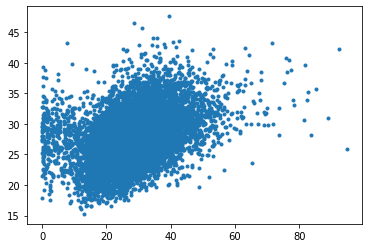

In [32]:
y_pred = clf.predict(X_test)
plt.plot(y_test,y_pred, ".")
_ = score(y_test, y_pred)